In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn

In [23]:
df = pd.read_csv('/home/muregz/data_analysis/Netflix/Netflix Userbase.csv')
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


# Analysing the data to see:

    1. which countrries have been represented in the data
    2. subscription types
    3.devices used

In [24]:
countries = df['Country'].unique()
print(countries)

['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']


In [25]:
subscription = df['Subscription Type'].unique()
print(subscription)

['Basic' 'Premium' 'Standard']


In [26]:
devices = df['Device'].unique()
print(devices)

['Smartphone' 'Tablet' 'Smart TV' 'Laptop']


# checking the age distribution to see how it affects:

    1.Type of device they use
    2. The subscription type they use
    3. The revenue they generate

In [27]:
age = df['Age'].unique()
print(sorted(age))

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [83]:
age_groups = [i for i in range(25, 60 ,5)]
age_groups = pd.cut(df["Age"], bins=age_groups)


# Group the DataFrame by the Age column and count the number of people in each age group
age_group_counts = age_groups.value_counts()

# Print the age group counts
print(age_group_counts)




(35, 40]    514
(30, 35]    493
(45, 50]    492
(40, 45]    485
(25, 30]    423
(50, 55]     93
Name: Age, dtype: int64


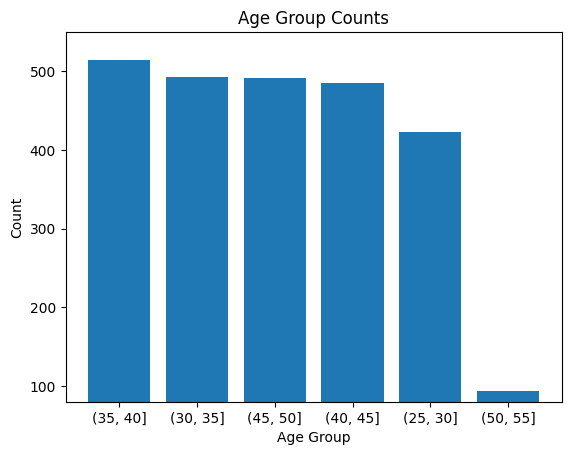

In [85]:
plt.bar(age_group_counts.index.astype(str), age_group_counts.values)

# Set the y-axis limits
plt.ylim(80, 550)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Counts')

# Display the plot
plt.show()

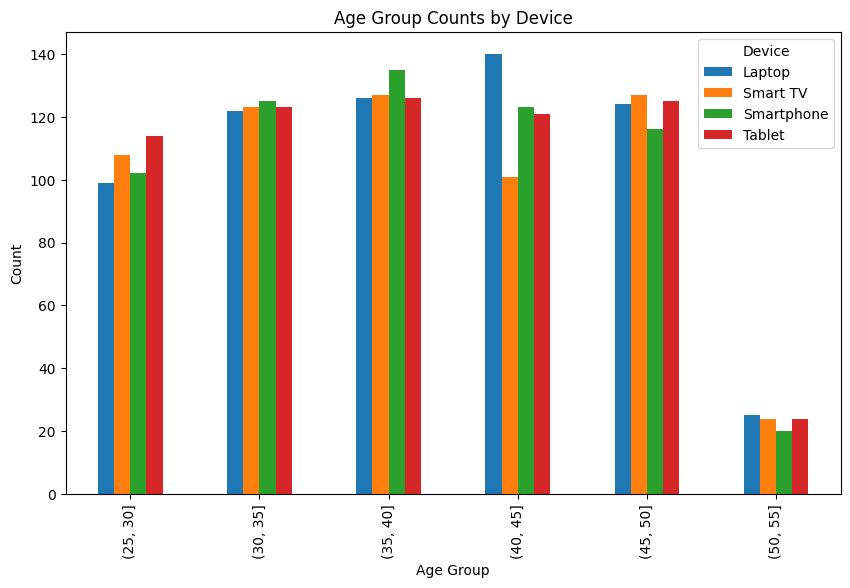

In [86]:
grouped_counts = df.groupby([age_groups, 'Device']).size().unstack()

# Create a bar plot
grouped_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Counts by Device')

# Add a legend
plt.legend(title='Device')

# Display the plot
plt.show()

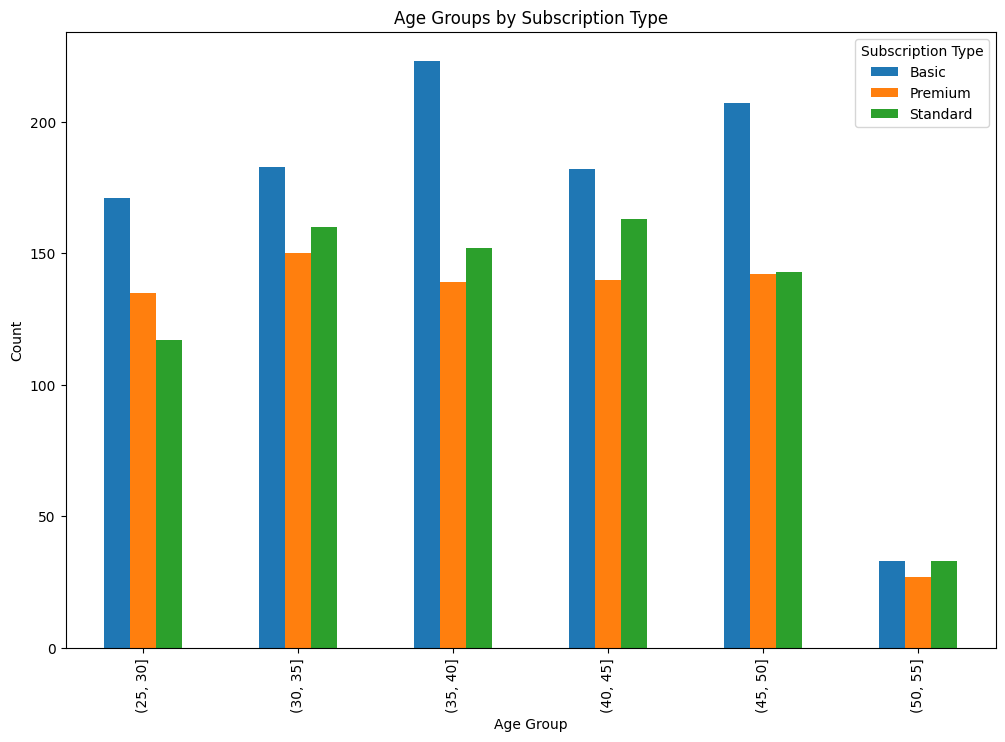

In [93]:
grouped_counts = df.groupby([age_groups, 'Subscription Type']).size().unstack()

grouped_counts.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Groups by Subscription Type')
plt.legend(title='Subscription Type')
plt.show()

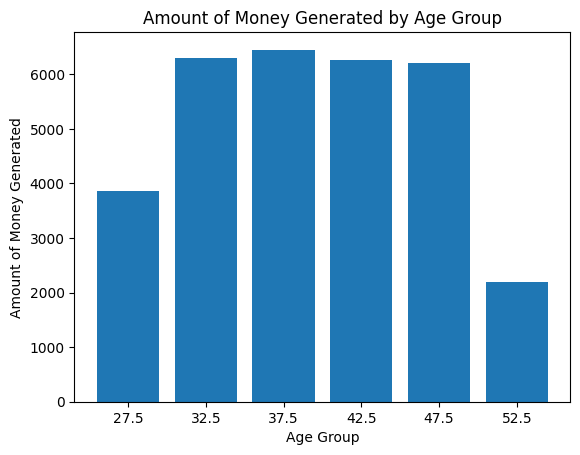

In [107]:
import matplotlib.pyplot as plt

# Define the age groups and calculate the midpoints
age_groups = [i for i in range(25, 60, 5)]
age_group_midpoints = [(age_groups[i] + age_groups[i+1]) / 2 for i in range(len(age_groups)-1)]



# Group the DataFrame by age groups and calculate the sum of money generated
df['Age Group'] = pd.cut(df['Age'], bins=age_groups, right=False, labels=age_group_midpoints)
age_group_money = df.groupby('Age Group')['Monthly Revenue'].sum()

# Create a bar plot
plt.bar(age_group_money.index.astype(str), age_group_money.values)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Amount of Money Generated')
plt.title('Amount of Money Generated by Age Group')

# Display the plot
plt.show()

